In [1]:
import requests
from bs4 import BeautifulSoup
import nltk
from nltk.tokenize import RegexpTokenizer
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
# Read in Data
url = 'http://www.gutenberg.org/files/24689/24689-h/24689-h.htm'
r = requests.get(url)

In [19]:
type(r)

requests.models.Response

In [20]:
#Converting to Soup
html = r.text
soup = BeautifulSoup(html,"html5lib")
type(soup)

bs4.BeautifulSoup

In [21]:
soup.title.string

'\n      The Project Gutenberg eBook of New Italian Sketches, by John Addington Symonds.\n    '

In [24]:
#Tokenize
text = soup.get_text()
tokenizer = RegexpTokenizer('\w+')
tokens = tokenizer.tokenize(text)
tokens[:10]

['The',
 'Project',
 'Gutenberg',
 'eBook',
 'of',
 'New',
 'Italian',
 'Sketches',
 'by',
 'John']

In [25]:
# Make all lower case
words = []
for word in tokens:
    words.append(word.lower())
words[:10]

['the',
 'project',
 'gutenberg',
 'ebook',
 'of',
 'new',
 'italian',
 'sketches',
 'by',
 'john']

In [26]:
#Removing stopwords
nltk.download('stopwords') 
stopwords = nltk.corpus.stopwords.words('english')
stopwords[:10]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [29]:
wordsWithoutStops = []
for word in words:
    if word not in stopwords:
        wordsWithoutStops.append(word)
wordsWithoutStops[:10]

['project',
 'gutenberg',
 'ebook',
 'new',
 'italian',
 'sketches',
 'john',
 'addington',
 'symonds',
 'cdata']

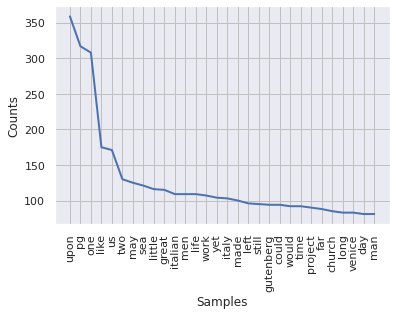

In [30]:
#plot freq. of words
%matplotlib inline
sns.set()
frequencyDis = nltk.FreqDist(wordsWithoutStops)
frequencyDis.plot(30)